(eigen)=
# Eigenvalues and Eigenvectors 

```{index} single: Eigenvalues and Eigenvectors
```

## Overview

Eigenvalues and eigenvectors are a relatively advanced topic in linear algebra.

At the same time, these concepts are extremely useful for 

* economic modeling (especially dynamics!)
* statistics
* some parts of applied mathematics
* machine learning
* and many other fields of science.

In this lecture we explain the basics of eigenvalues and eigenvectors and introduce the Neumann Series Lemma.

We assume in this lecture that students are familiar with matrices
 and understand {doc}`the basics of matrix algebra<linear_equations>`.

We will use the following imports:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_power
from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

(matrices_as_transformation)=
## Matrices as transformations

Let's start by discussing an important concept concerning matrices.

### Mapping vectors to vectors

One way to think about a matrix is as a rectangular collection of
numbers.

Another way to think about a matrix is as a *map* (i.e., as a function) that
transforms vectors to new vectors.

To understand the second point of view, suppose we multiply an $n \times m$
matrix $A$ with an $m \times 1$ column vector $x$ to obtain an $n \times 1$
column vector $y$:

$$
    Ax = y
$$

If we fix $A$ and consider different choices of $x$, we can understand $A$ as
a map transforming $x$ to $Ax$.

Because $A$ is $n \times m$, it transforms $m$-vectors to $n$-vectors.

We can write this formally as $A \colon \mathbb{R}^m \rightarrow \mathbb{R}^n$.

You might argue that if $A$ is a function then we should write 
$A(x) = y$ rather than $Ax = y$ but the second notation is more conventional.

### Square matrices

Let's restrict our discussion to square matrices.

In the above discussion, this means that $m=n$ and $A$ maps $\mathbb R^n$ to
itself.

This means $A$ is an $n \times n$ matrix that maps (or "transforms") a vector
$x$ in $\mathbb{R}^n$ to a new vector $y=Ax$ also in $\mathbb{R}^n$.

```{prf:example}
:label: eigen1_ex_sq

$$
    \begin{bmatrix}
        2 & 1 \\
        -1 & 1
    \end{bmatrix}
    \begin{bmatrix}
        1 \\
        3
    \end{bmatrix}
    =
    \begin{bmatrix}
        5 \\
        2
    \end{bmatrix}
$$

Here, the matrix

$$
    A = \begin{bmatrix} 2 & 1 \\ 
                        -1 & 1 
        \end{bmatrix}
$$

transforms the vector $x = \begin{bmatrix} 1 \\ 3 \end{bmatrix}$ to the vector
$y = \begin{bmatrix} 5 \\ 2 \end{bmatrix}$.
```

Let's visualize this using Python:

In [2]:
A = np.array([[2,  1],
              [-1, 1]])

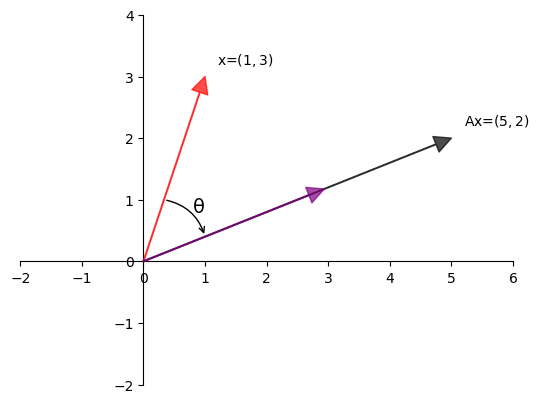

In [3]:
from math import sqrt

fig, ax = plt.subplots()
# Set the axes through the origin

for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-2, 6), ylim=(-2, 4), aspect=1)

vecs = ((1, 3), (5, 2))
c = ['r', 'black']
for i, v in enumerate(vecs):
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(color=c[i],
                shrink=0,
                alpha=0.7,
                width=0.5))

ax.text(0.2 + 1, 0.2 + 3, 'x=$(1,3)$')
ax.text(0.2 + 5, 0.2 + 2, 'Ax=$(5,2)$')

ax.annotate('', xy=(sqrt(10/29) * 5, sqrt(10/29) * 2), xytext=(0, 0),
            arrowprops=dict(color='purple',
                            shrink=0,
                            alpha=0.7,
                            width=0.5))

ax.annotate('', xy=(1, 2/5), xytext=(1/3, 1),
            arrowprops={'arrowstyle': '->',
                        'connectionstyle': 'arc3,rad=-0.3'},
            horizontalalignment='center')
ax.text(0.8, 0.8, f'θ', fontsize=14)

plt.show()

One way to understand this transformation is that $A$ 

* first rotates $x$ by some angle $\theta$ and
* then scales it by some scalar $\gamma$ to obtain the image $y$ of $x$.



## Types of transformations

Let's examine some standard transformations we can perform with matrices.

Below we visualize transformations by thinking of vectors as points
instead of arrows.

We consider how a given matrix transforms 

* a grid of points and 
* a set of points located on the unit circle in $\mathbb{R}^2$.

To build the transformations we will use two functions, called `grid_transform` and `circle_transform`.

Each of these functions visualizes the actions of a given $2 \times 2$ matrix $A$.

In [4]:
def colorizer(x, y):
    r = min(1, 1-y/3)
    g = min(1, 1+y/3)
    b = 1/4 + x/16
    return (r, g, b)


def grid_transform(A=np.array([[1, -1], [1, 1]])):
    xvals = np.linspace(-4, 4, 9)
    yvals = np.linspace(-3, 3, 7)
    xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])
    uvgrid = A @ xygrid

    colors = list(map(colorizer, xygrid[0], xygrid[1]))

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    for axes in ax:
        axes.set(xlim=(-11, 11), ylim=(-11, 11))
        axes.set_xticks([])
        axes.set_yticks([])
        for spine in ['left', 'bottom']:
            axes.spines[spine].set_position('zero')
        for spine in ['right', 'top']:
            axes.spines[spine].set_color('none')

    # Plot x-y grid points
    ax[0].scatter(xygrid[0], xygrid[1], s=36, c=colors, edgecolor="none")
    # ax[0].grid(True)
    # ax[0].axis("equal")
    ax[0].set_title("points $x_1, x_2, \cdots, x_k$")

    # Plot transformed grid points
    ax[1].scatter(uvgrid[0], uvgrid[1], s=36, c=colors, edgecolor="none")
    # ax[1].grid(True)
    # ax[1].axis("equal")
    ax[1].set_title("points $Ax_1, Ax_2, \cdots, Ax_k$")

    plt.show()


def circle_transform(A=np.array([[-1, 2], [0, 1]])):

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    for axes in ax:
        axes.set(xlim=(-4, 4), ylim=(-4, 4))
        axes.set_xticks([])
        axes.set_yticks([])
        for spine in ['left', 'bottom']:
            axes.spines[spine].set_position('zero')
        for spine in ['right', 'top']:
            axes.spines[spine].set_color('none')

    θ = np.linspace(0, 2 * np.pi, 150)
    r = 1

    θ_1 = np.empty(12)
    for i in range(12):
        θ_1[i] = 2 * np.pi * (i/12)

    x = r * np.cos(θ)
    y = r * np.sin(θ)
    a = r * np.cos(θ_1)
    b = r * np.sin(θ_1)
    a_1 = a.reshape(1, -1)
    b_1 = b.reshape(1, -1)
    colors = list(map(colorizer, a, b))
    ax[0].plot(x, y, color='black', zorder=1)
    ax[0].scatter(a_1, b_1, c=colors, alpha=1, s=60,
                  edgecolors='black', zorder=2)
    ax[0].set_title("unit circle in $\mathbb{R}^2$")

    x1 = x.reshape(1, -1)
    y1 = y.reshape(1, -1)
    ab = np.concatenate((a_1, b_1), axis=0)
    transformed_ab = A @ ab
    transformed_circle_input = np.concatenate((x1, y1), axis=0)
    transformed_circle = A @ transformed_circle_input
    ax[1].plot(transformed_circle[0, :],
               transformed_circle[1, :], color='black', zorder=1)
    ax[1].scatter(transformed_ab[0, :], transformed_ab[1:,],
                  color=colors, alpha=1, s=60, edgecolors='black', zorder=2)
    ax[1].set_title("transformed circle")

    plt.show()

### Scaling

A matrix of the form 

$$
    \begin{bmatrix} 
        \alpha & 0 
        \\ 0 & \beta 
    \end{bmatrix}
$$

scales vectors across the x-axis by a factor $\alpha$ and along the y-axis by
a factor $\beta$.

Here we illustrate a simple example where $\alpha = \beta = 3$.

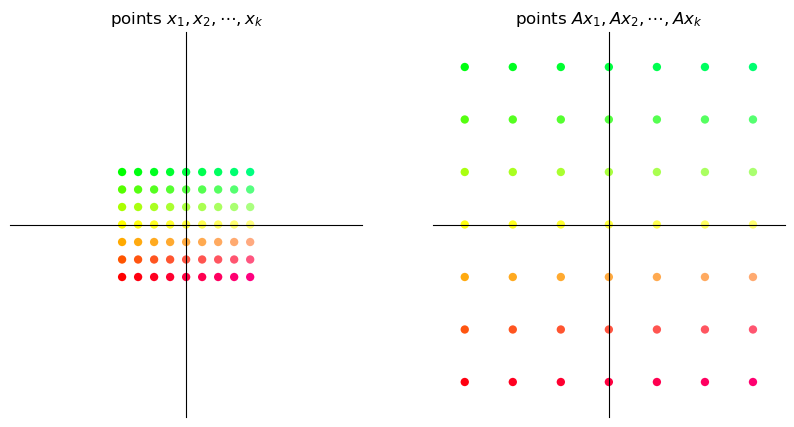

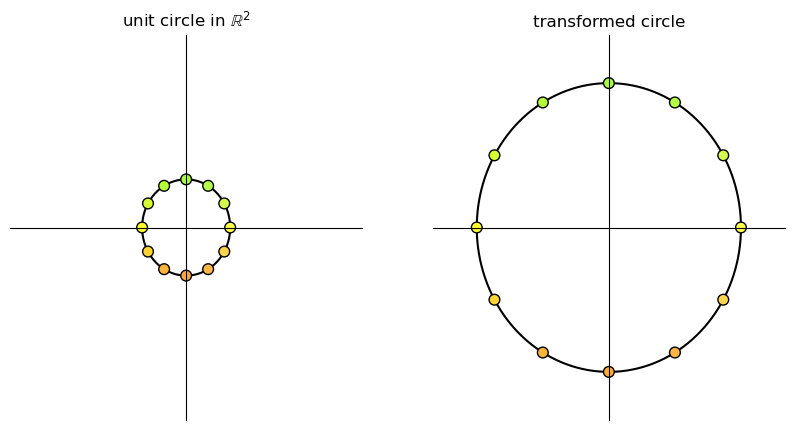

In [5]:
A = np.array([[3, 0],  # scaling by 3 in both directions
              [0, 3]])
grid_transform(A)
circle_transform(A)

### Shearing

A "shear" matrix of the form 

$$
    \begin{bmatrix} 
        1 & \lambda \\ 
        0 & 1 
    \end{bmatrix}
$$ 

stretches vectors along the x-axis by an amount proportional to the
y-coordinate of a point.

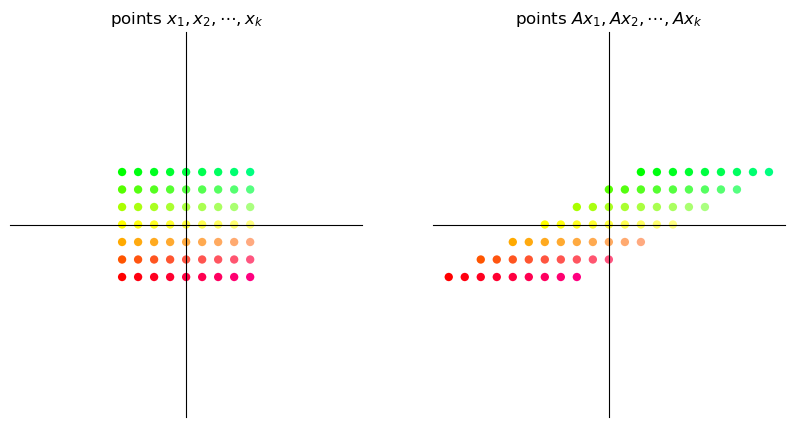

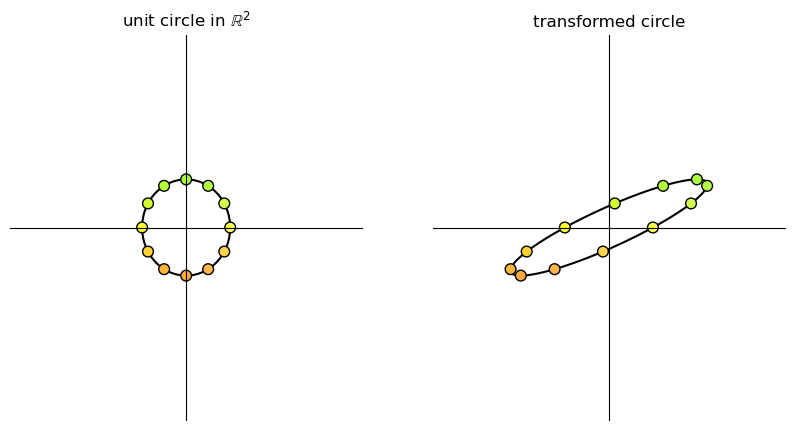

In [6]:
A = np.array([[1, 2],     # shear along x-axis
              [0, 1]])
grid_transform(A)
circle_transform(A)

### Rotation

A matrix of the form 

$$
    \begin{bmatrix} 
        \cos \theta & \sin \theta 
        \\ - \sin \theta & \cos \theta 
    \end{bmatrix}
$$
is called a _rotation matrix_.

This matrix rotates vectors clockwise by an angle $\theta$.

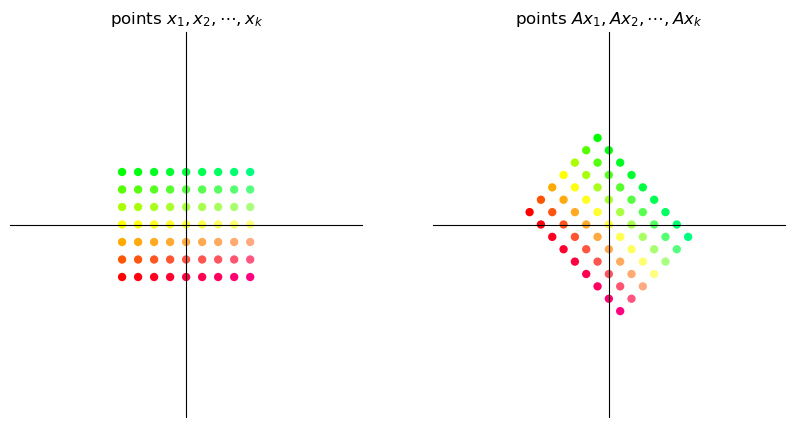

In [7]:
θ = np.pi/4  # 45 degree clockwise rotation
A = np.array([[np.cos(θ), np.sin(θ)],
              [-np.sin(θ), np.cos(θ)]])
grid_transform(A)

### Permutation

The permutation matrix 

$$
    \begin{bmatrix} 
        0 & 1 \\ 
        1 & 0 
    \end{bmatrix}
$$ 
interchanges the coordinates of a vector.

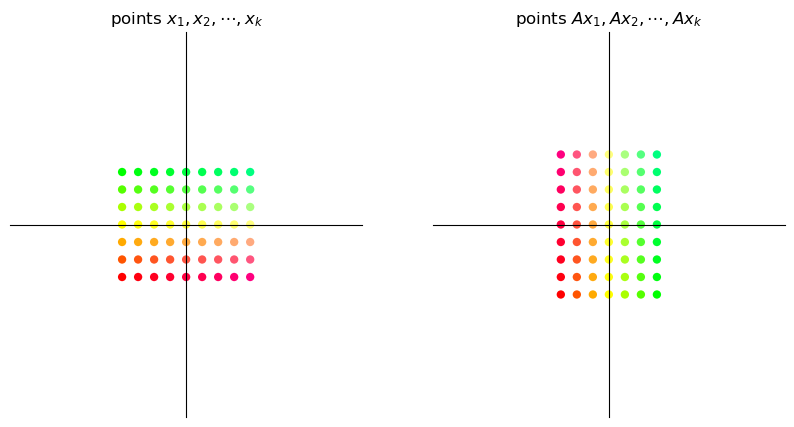

In [8]:
A = np.column_stack([[0, 1], [1, 0]])
grid_transform(A)

More examples of common transition matrices can be found [here](https://en.wikipedia.org/wiki/Transformation_matrix#Examples_in_2_dimensions).

## Matrix multiplication as composition

Since matrices act as functions that transform one vector to another, we can
apply the concept of function composition to matrices as well. 


### Linear compositions

Consider the two matrices 

$$
    A = 
        \begin{bmatrix} 
            0 & 1 \\ 
            -1 & 0 
        \end{bmatrix}
        \quad \text{and} \quad
    B = 
        \begin{bmatrix} 
            1 & 2 \\ 
            0 & 1 
        \end{bmatrix}
$$ 

What will the output be when we try to obtain $ABx$ for some $2 \times 1$
vector $x$?

$$
\color{red}{\underbrace{
 \color{black}{\begin{bmatrix}
  0 & 1 \\
 -1 & 0
 \end{bmatrix}}
}_{\textstyle A} }
\color{red}{\underbrace{
 \color{black}{\begin{bmatrix}
  1 & 2 \\
  0 & 1
 \end{bmatrix}}
}_{\textstyle B}}
\color{red}{\overbrace{
 \color{black}{\begin{bmatrix}
  1 \\
  3
 \end{bmatrix}}
}^{\textstyle x}}
\rightarrow
\color{red}{\underbrace{
 \color{black}{\begin{bmatrix}
  0 & 1 \\
  -1 & -2
 \end{bmatrix}}
}_{\textstyle AB}}
\color{red}{\overbrace{
 \color{black}{\begin{bmatrix}
  1 \\
  3
 \end{bmatrix}}
}^{\textstyle x}}
\rightarrow
\color{red}{\overbrace{
 \color{black}{\begin{bmatrix}
  3 \\
  -7
 \end{bmatrix}}
}^{\textstyle y}}
$$

$$
\color{red}{\underbrace{
 \color{black}{\begin{bmatrix}
  0 & 1 \\
 -1 & 0
 \end{bmatrix}}
}_{\textstyle A} }
\color{red}{\underbrace{
 \color{black}{\begin{bmatrix}
  1 & 2 \\
  0 & 1
 \end{bmatrix}}
}_{\textstyle B}}
\color{red}{\overbrace{
 \color{black}{\begin{bmatrix}
  1 \\
  3
 \end{bmatrix}}
}^{\textstyle x}}
\rightarrow
\color{red}{\underbrace{
 \color{black}{\begin{bmatrix}
  0 & 1 \\
  -1 & 0
 \end{bmatrix}}
}_{\textstyle A}}
\color{red}{\overbrace{
 \color{black}{\begin{bmatrix}
  7 \\
  3
 \end{bmatrix}}
}^{\textstyle Bx}}
\rightarrow
\color{red}{\overbrace{
 \color{black}{\begin{bmatrix}
  3 \\
  -7
 \end{bmatrix}}
}^{\textstyle y}}
$$

We can observe that applying the transformation $AB$ on the vector $x$ is the
same as first applying $B$ on $x$ and then applying $A$ on the vector $Bx$.

Thus the matrix product $AB$ is the
[composition](https://en.wikipedia.org/wiki/Function_composition) of the
matrix transformations $A$ and $B$

This means first apply transformation $B$ and then
transformation $A$.

When we matrix multiply an $n \times m$ matrix $A$ with an $m \times k$ matrix
$B$ the obtained matrix product is an $n \times k$ matrix $AB$.

Thus, if $A$ and $B$ are transformations such that $A \colon \mathbb{R}^m \to
\mathbb{R}^n$ and $B \colon \mathbb{R}^k \to \mathbb{R}^m$, then $AB$
transforms $\mathbb{R}^k$ to $\mathbb{R}^n$.

Viewing matrix multiplication as composition of maps helps us
understand why, under matrix multiplication, $AB$ is generally not equal to $BA$.

(After all, when we compose functions, the order usually matters.)

### Examples

Let $A$ be the $90^{\circ}$ clockwise rotation matrix given by
$\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$ and let $B$ be a shear matrix
along the x-axis given by $\begin{bmatrix} 1 & 2 \\ 0 & 1 \end{bmatrix}$.

We will visualize how a grid of points changes when we apply the
transformation $AB$ and then compare it with the transformation $BA$.

In [9]:
def grid_composition_transform(A=np.array([[1, -1], [1, 1]]),
                               B=np.array([[1, -1], [1, 1]])):
    xvals = np.linspace(-4, 4, 9)
    yvals = np.linspace(-3, 3, 7)
    xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])
    uvgrid = B @ xygrid
    abgrid = A @ uvgrid

    colors = list(map(colorizer, xygrid[0], xygrid[1]))

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    for axes in ax:
        axes.set(xlim=(-12, 12), ylim=(-12, 12))
        axes.set_xticks([])
        axes.set_yticks([])
        for spine in ['left', 'bottom']:
            axes.spines[spine].set_position('zero')
        for spine in ['right', 'top']:
            axes.spines[spine].set_color('none')

    # Plot grid points
    ax[0].scatter(xygrid[0], xygrid[1], s=36, c=colors, edgecolor="none")
    ax[0].set_title("points $x_1, x_2, \cdots, x_k$")

    # Plot intermediate grid points
    ax[1].scatter(uvgrid[0], uvgrid[1], s=36, c=colors, edgecolor="none")
    ax[1].set_title("points $Bx_1, Bx_2, \cdots, Bx_k$")

    # Plot transformed grid points
    ax[2].scatter(abgrid[0], abgrid[1], s=36, c=colors, edgecolor="none")
    ax[2].set_title("points $ABx_1, ABx_2, \cdots, ABx_k$")

    plt.show()

In [10]:
A = np.array([[0, 1],     # 90 degree clockwise rotation
              [-1, 0]])
B = np.array([[1, 2],     # shear along x-axis
              [0, 1]])

#### Shear then rotate

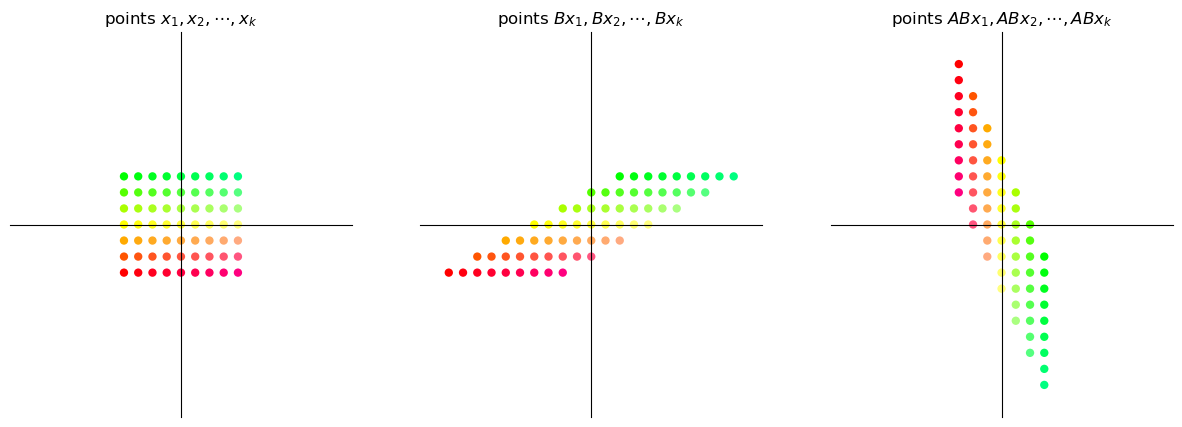

In [11]:
grid_composition_transform(A, B)  # transformation AB

#### Rotate then shear

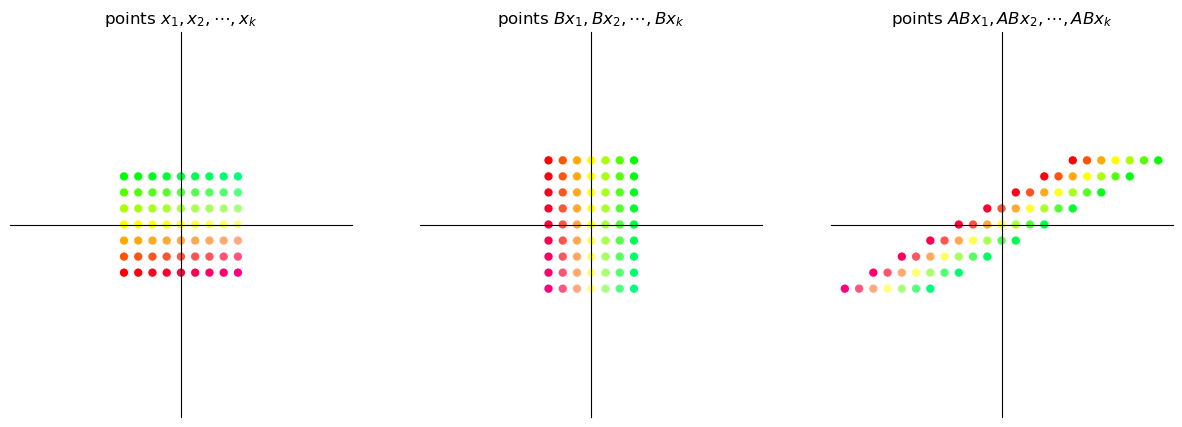

In [12]:
grid_composition_transform(B,A)         # transformation BA

It is evident that the transformation $AB$ is not the same as the transformation $BA$.

## Iterating on a fixed map

In economics (and especially in dynamic modeling), we are often interested in
analyzing behavior where we repeatedly apply a fixed matrix.

For example, given a vector $v$ and a matrix $A$, we are interested in
studying the sequence

$$ 
    v, \quad
    Av, \quad
    AAv = A^2v, \quad \ldots
$$

Let's first see examples of a sequence of iterates $(A^k v)_{k \geq 0}$ under
different maps $A$.

(plot_series)=

In [13]:
def plot_series(A, v, n):

    B = np.array([[1, -1],
                  [1, 0]])

    fig, ax = plt.subplots()

    ax.set(xlim=(-4, 4), ylim=(-4, 4))
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    θ = np.linspace(0, 2 * np.pi, 150)
    r = 2.5
    x = r * np.cos(θ)
    y = r * np.sin(θ)
    x1 = x.reshape(1, -1)
    y1 = y.reshape(1, -1)
    xy = np.concatenate((x1, y1), axis=0)

    ellipse = B @ xy
    ax.plot(ellipse[0, :], ellipse[1, :], color='black',
            linestyle=(0, (5, 10)), linewidth=0.5)

    # Initialize holder for trajectories
    colors = plt.cm.rainbow(np.linspace(0, 1, 20))

    for i in range(n):
        iteration = matrix_power(A, i) @ v
        v1 = iteration[0]
        v2 = iteration[1]
        ax.scatter(v1, v2, color=colors[i])
        if i == 0:
            ax.text(v1+0.25, v2, f'$v$')
        elif i == 1:
            ax.text(v1+0.25, v2, f'$Av$')
        elif 1 < i < 4:
            ax.text(v1+0.25, v2, f'$A^{i}v$')
    plt.show()

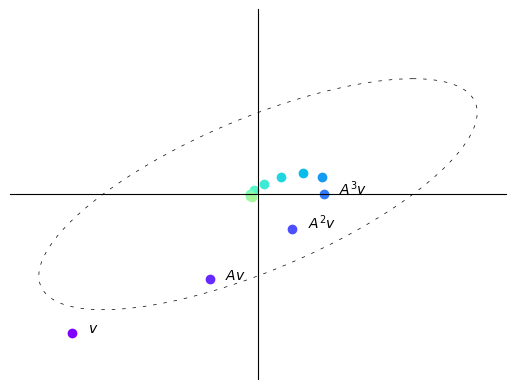

In [14]:
A = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
A = (1/(2*sqrt(2))) * A
v = (-3, -3)
n = 12

plot_series(A, v, n)

Here with each iteration the vectors get shorter, i.e., move closer to the origin.

In this case, repeatedly multiplying a vector by $A$ makes the vector "spiral in".

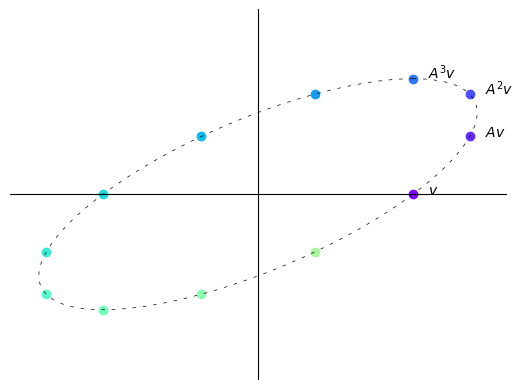

In [15]:
B = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
B = (1/2) * B
v = (2.5, 0)
n = 12

plot_series(B, v, n)

Here with each iteration vectors do not tend to get longer or shorter. 

In this case, repeatedly multiplying a vector by $A$ simply "rotates it around
an ellipse".

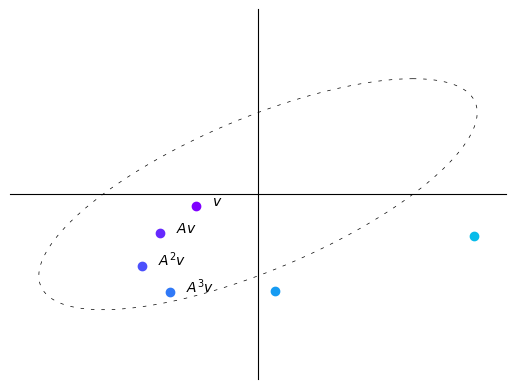

In [16]:
B = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
B = (1/sqrt(2)) * B
v = (-1, -0.25)
n = 6

plot_series(B, v, n)

Here with each iteration vectors tend to get longer, i.e., farther from the
origin. 

In this case, repeatedly multiplying a vector by $A$ makes the vector "spiral out".

We thus observe that the sequence $(A^kv)_{k \geq 0}$ behaves differently depending on the map $A$ itself.

We now discuss the property of A that determines this behavior.

(la_eigenvalues)=
## Eigenvalues 

```{index} single: Linear Algebra; Eigenvalues
```

In this section we introduce the notions of eigenvalues and eigenvectors.

### Definitions

Let $A$ be an $n \times n$ square matrix.

If $\lambda$ is scalar and $v$ is a non-zero $n$-vector such that

$$
A v = \lambda v.
$$


Then we say that $\lambda$ is an *eigenvalue* of $A$, and $v$ is the corresponding *eigenvector*.

Thus, an eigenvector of $A$ is a nonzero vector $v$ such that when the map $A$ is
applied, $v$ is merely scaled.

The next figure shows two eigenvectors (blue arrows) and their images under
$A$ (red arrows).

As expected, the image $Av$ of each $v$ is just a scaled version of the original

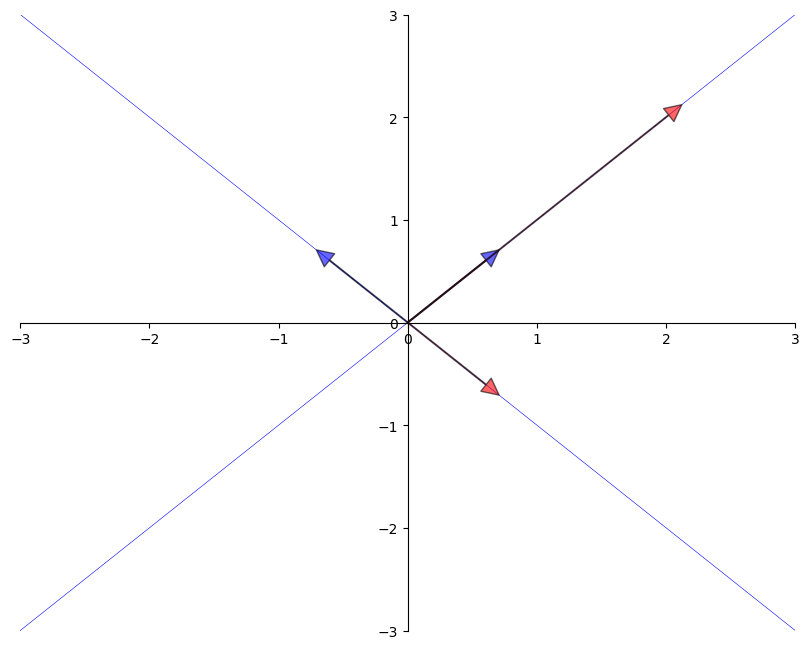

In [17]:
from numpy.linalg import eig

A = [[1, 2],
     [2, 1]]
A = np.array(A)
evals, evecs = eig(A)
evecs = evecs[:, 0], evecs[:, 1]

fig, ax = plt.subplots(figsize=(10, 8))
# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
# ax.grid(alpha=0.4)

xmin, xmax = -3, 3
ymin, ymax = -3, 3
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# Plot each eigenvector
for v in evecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the image of each eigenvector
for v in evecs:
    v = A @ v
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the lines they run through
x = np.linspace(xmin, xmax, 3)
for v in evecs:
    a = v[1] / v[0]
    ax.plot(x, a * x, 'b-', lw=0.4)

plt.show()

### Complex values

So far our definition of eigenvalues and eigenvectors seems straightforward.

There is one complication we haven't mentioned yet:

When solving $Av = \lambda v$, 

* $\lambda$ is allowed to be a complex number and
* $v$ is allowed to be an $n$-vector of complex numbers.

We will see some examples below.

### Some mathematical details

We note some mathematical details for more advanced readers.

(Other readers can skip to the next section.)

The eigenvalue equation is equivalent to $(A - \lambda I) v = 0$. 

This equation has a nonzero solution $v$ only when the columns of $A - \lambda I$ are linearly dependent.

This in turn is equivalent to stating the determinant is zero.

Hence, to find all eigenvalues, we can look for $\lambda$ such that the
determinant of $A - \lambda I$ is zero.

This problem can be expressed as one of solving for the roots of a polynomial
in $\lambda$ of degree $n$.

This in turn implies the existence of $n$ solutions in the complex
plane, although some might be repeated.

### Facts 

Some nice facts about the eigenvalues of a square matrix $A$ are as follows:

1. the determinant of $A$ equals the product of the eigenvalues
2. the trace of $A$ (the sum of the elements on the principal diagonal) equals the sum of the eigenvalues
3. if $A$ is symmetric, then all of its eigenvalues are real
4. if $A$ is invertible and $\lambda_1, \ldots, \lambda_n$ are its eigenvalues, then the eigenvalues of $A^{-1}$ are $1/\lambda_1, \ldots, 1/\lambda_n$.

A corollary of the last statement is that a matrix is invertible if and only if all its eigenvalues are nonzero.

### Computation

Using NumPy, we can solve for the eigenvalues and eigenvectors of a matrix as follows

In [18]:
from numpy.linalg import eig

A = ((1, 2),
     (2, 1))

A = np.array(A)
evals, evecs = eig(A)
evals  # eigenvalues

array([ 3., -1.])

In [19]:
evecs  # eigenvectors

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

Note that the *columns* of `evecs` are the eigenvectors.

Since any scalar multiple of an eigenvector is an eigenvector with the same
eigenvalue (which can be verified), the `eig` routine normalizes the length of each eigenvector
to one.

The eigenvectors and eigenvalues of a map $A$ determine how a vector $v$ is transformed when we repeatedly multiply by $A$.

This is discussed further later.


(la_neumann)=
## The Neumann Series Lemma

```{index} single: Neumann's Lemma
```

In this section we present a famous result about series of matrices that has
many applications in economics.

### Scalar series

Here's a fundamental result about series:

If $a$ is a number and $|a| < 1$, then

```{math}
:label: gp_sum

    \sum_{k=0}^{\infty} a^k =\frac{1}{1-a} = (1 - a)^{-1}

```

For a one-dimensional linear equation $x = ax + b$ where x is unknown we can thus conclude that the solution $x^{*}$ is given by:

$$
    x^{*} = \frac{b}{1-a} = \sum_{k=0}^{\infty} a^k b
$$

### Matrix series

A generalization of this idea exists in the matrix setting.

Consider the system of equations $x = Ax + b$ where $A$ is an $n \times n$
square matrix and $x$ and $b$ are both column vectors in $\mathbb{R}^n$.

Using matrix algebra we can conclude that the solution to this system of equations will be given by:

```{math}
:label: neumann_eqn

    x^{*} = (I-A)^{-1}b

```

What guarantees the existence of a unique vector $x^{*}$ that satisfies
{eq}`neumann_eqn`?

The following is a fundamental result in functional analysis that generalizes
{eq}`gp_sum` to a multivariate case.

(neumann_series_lemma)=
```{prf:Theorem} Neumann Series Lemma
:label: neumann_series_lemma

Let $A$ be a square matrix and let $A^k$ be the $k$-th power of $A$.

Let $r(A)$ be the **spectral radius** of $A$, defined as $\max_i |\lambda_i|$, where

* $\{\lambda_i\}_i$ is the set of eigenvalues of $A$ and
* $|\lambda_i|$ is the modulus of the complex number $\lambda_i$

Neumann's Theorem states the following: If $r(A) < 1$, then $I - A$ is invertible, and

$$
(I - A)^{-1} = \sum_{k=0}^{\infty} A^k
$$
```

We can see the Neumann Series Lemma in action in the following example.

In [20]:
A = np.array([[0.4, 0.1],
              [0.7, 0.2]])

evals, evecs = eig(A)   # finding eigenvalues and eigenvectors

r = max(abs(λ) for λ in evals)    # compute spectral radius
print(r)

0.5828427124746189


The spectral radius $r(A)$ obtained is less than 1.

Thus, we can apply the Neumann Series Lemma to find $(I-A)^{-1}$.

In [21]:
I = np.identity(2)  # 2 x 2 identity matrix
B = I - A

In [22]:
B_inverse = np.linalg.inv(B)  # direct inverse method

In [23]:
A_sum = np.zeros((2, 2))  # power series sum of A
A_power = I
for i in range(50):
    A_sum += A_power
    A_power = A_power @ A

Let's check equality between the sum and the inverse methods.

In [24]:
np.allclose(A_sum, B_inverse)

True

Although we truncate the infinite sum at $k = 50$, both methods give us the same
result which illustrates the result of the Neumann Series Lemma.


## Exercises

```{exercise}
:label: eig1_ex1

Power iteration is a method for finding the greatest absolute eigenvalue of a diagonalizable matrix.

The method starts with a random vector $b_0$ and repeatedly applies the matrix $A$ to it

$$
b_{k+1}=\frac{A b_k}{\left\|A b_k\right\|}
$$

A thorough discussion of the method can be found [here](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter15.02-The-Power-Method.html).

In this exercise, first implement the power iteration method and use it to find the greatest absolute eigenvalue and its corresponding eigenvector.

Then visualize the convergence.
```

```{solution-start} eig1_ex1
:class: dropdown
```

Here is one solution.

We start by looking into the distance between the eigenvector approximation and the true eigenvector.

The approximated greatest absolute eigenvalue is         4.00
The real eigenvalue is [ 4. -2.  2.]


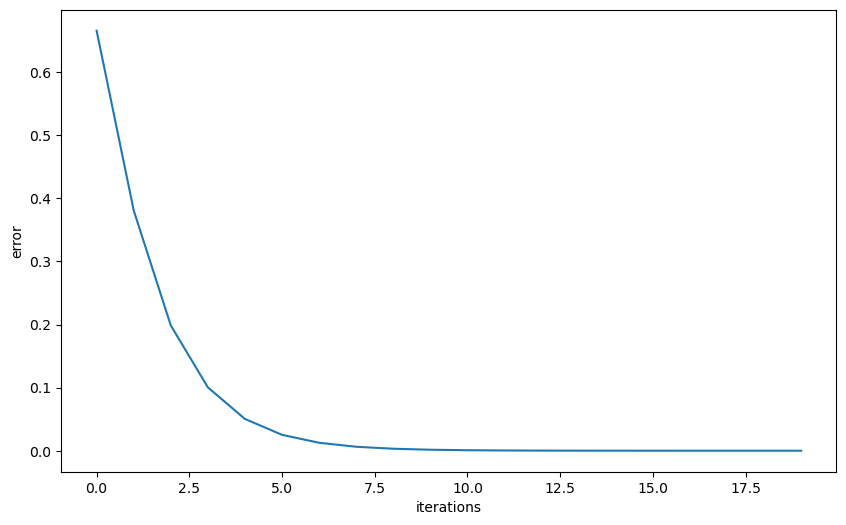

In [25]:
# Define a matrix A
A = np.array([[1, 0, 3],
              [0, 2, 0],
              [3, 0, 1]])

num_iters = 20

# Define a random starting vector b
b = np.random.rand(A.shape[1])

# Get the leading eigenvector of matrix A
eigenvector = np.linalg.eig(A)[1][:, 0]

errors = []
res = []

# Power iteration loop
for i in range(num_iters):
    # Multiply b by A
    b = A @ b
    # Normalize b
    b = b / np.linalg.norm(b)
    # Append b to the list of eigenvector approximations
    res.append(b)
    err = np.linalg.norm(np.array(b)
                         - eigenvector)
    errors.append(err)

greatest_eigenvalue = np.dot(A @ b, b) / np.dot(b, b)
print(f'The approximated greatest absolute eigenvalue is \
        {greatest_eigenvalue:.2f}')
print('The real eigenvalue is', np.linalg.eig(A)[0])

# Plot the eigenvector approximations for each iteration
plt.figure(figsize=(10, 6))
plt.xlabel('iterations')
plt.ylabel('error')
_ = plt.plot(errors)

Then we can look at the trajectory of the eigenvector approximation.

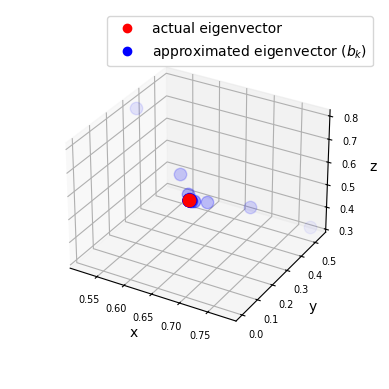

In [26]:
# Set up the figure and axis for 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the eigenvectors
ax.scatter(eigenvector[0],
           eigenvector[1],
           eigenvector[2],
           color='r', s=80)

for i, vec in enumerate(res):
    ax.scatter(vec[0], vec[1], vec[2],
               color='b',
               alpha=(i+1)/(num_iters+1),
               s=80)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.tick_params(axis='both', which='major', labelsize=7)

points = [plt.Line2D([0], [0], linestyle='none',
                     c=i, marker='o') for i in ['r', 'b']]
ax.legend(points, ['actual eigenvector',
                   r'approximated eigenvector ($b_k$)'])
ax.set_box_aspect(aspect=None, zoom=0.8)

plt.show()

```{solution-end}
```

```{exercise}
:label: eig1_ex2

We have discussed the trajectory of the vector $v$ after being transformed by $A$.

Consider the matrix $A = \begin{bmatrix} 1 & 2 \\ 1 & 1 \end{bmatrix}$ and the vector $v = \begin{bmatrix} 2 \\ -2 \end{bmatrix}$.

Try to compute the trajectory of $v$ after being transformed by $A$ for $n=4$ iterations and plot the result.

```

```{solution-start} eig1_ex2
:class: dropdown
```

eigenvalues:
 [ 2.41421356 -0.41421356]
eigenvectors:
 [[ 0.81649658 -0.81649658]
 [ 0.57735027  0.57735027]]


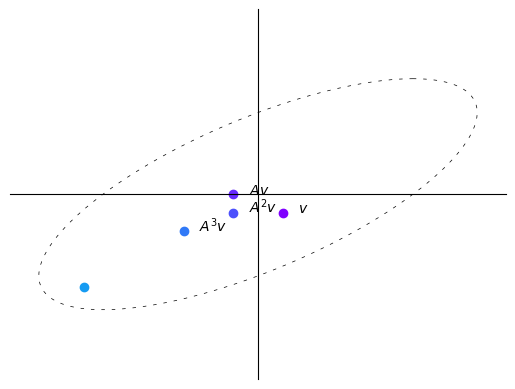

In [27]:
A = np.array([[1, 2],
              [1, 1]])
v = (0.4, -0.4)
n = 11

# Compute eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(A)

print(f'eigenvalues:\n {eigenvalues}')
print(f'eigenvectors:\n {eigenvectors}')

plot_series(A, v, n)

The result seems to converge to the eigenvector of $A$ with the largest eigenvalue.

Let's use a [vector field](https://en.wikipedia.org/wiki/Vector_field) to visualize the transformation brought by A.

(This is a more advanced topic in linear algebra, please step ahead if you are comfortable with the math.)

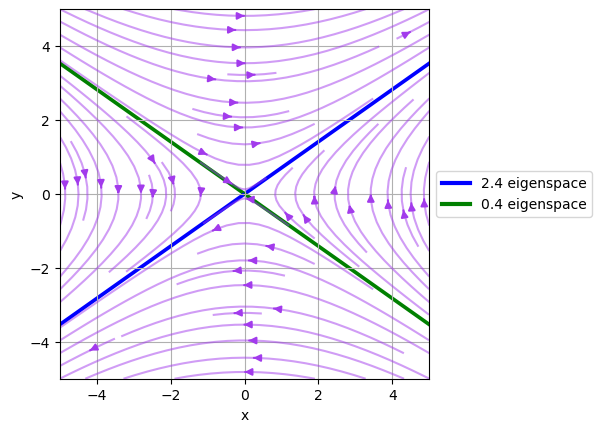

In [28]:
# Create a grid of points
x, y = np.meshgrid(np.linspace(-5, 5, 15),
                   np.linspace(-5, 5, 20))

# Apply the matrix A to each point in the vector field
vec_field = np.stack([x, y])
u, v = np.tensordot(A, vec_field, axes=1)

# Plot the transformed vector field
c = plt.streamplot(x, y, u - x, v - y,
                   density=1, linewidth=None, color='#A23BEC')
c.lines.set_alpha(0.5)
c.arrows.set_alpha(0.5)

# Draw eigenvectors
origin = np.zeros((2, len(eigenvectors)))
parameters = {'color': ['b', 'g'], 'angles': 'xy',
              'scale_units': 'xy', 'scale': 0.1, 'width': 0.01}
plt.quiver(*origin, eigenvectors[0],
           eigenvectors[1], **parameters)
plt.quiver(*origin, - eigenvectors[0],
           - eigenvectors[1], **parameters)

colors = ['b', 'g']
lines = [Line2D([0], [0], color=c, linewidth=3) for c in colors]
labels = ["2.4 eigenspace", "0.4 eigenspace"]
plt.legend(lines, labels, loc='center left',
           bbox_to_anchor=(1, 0.5))

plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Note that the vector field converges to the eigenvector of $A$ with the largest eigenvalue and diverges from the eigenvector of $A$ with the smallest eigenvalue.

In fact, the eigenvectors are also the directions in which the matrix $A$ stretches or shrinks the space.

Specifically, the eigenvector with the largest eigenvalue is the direction in which the matrix $A$ stretches the space the most.

We will see more intriguing examples in the following exercise.

```{solution-end}
```

```{exercise}
:label: eig1_ex3

{ref}`Previously <plot_series>`, we demonstrated the trajectory of the vector $v$ after being transformed by $A$ for three different matrices.

Use the visualization in the previous exercise to explain the trajectory of the vector $v$ after being transformed by $A$ for the three different matrices.

```


```{solution-start} eig1_ex3
:class: dropdown
```

Here is one solution

Example 1:

eigenvalues:
 [0.61237244+0.35355339j 0.61237244-0.35355339j]
eigenvectors:
 [[0.81649658+0.j         0.81649658-0.j        ]
 [0.40824829-0.40824829j 0.40824829+0.40824829j]]

Example 2:

eigenvalues:
 [0.8660254+0.5j 0.8660254-0.5j]
eigenvectors:
 [[0.81649658+0.j         0.81649658-0.j        ]
 [0.40824829-0.40824829j 0.40824829+0.40824829j]]



Example 3:

eigenvalues:
 [1.22474487+0.70710678j 1.22474487-0.70710678j]
eigenvectors:
 [[0.81649658+0.j         0.81649658-0.j        ]
 [0.40824829-0.40824829j 0.40824829+0.40824829j]]



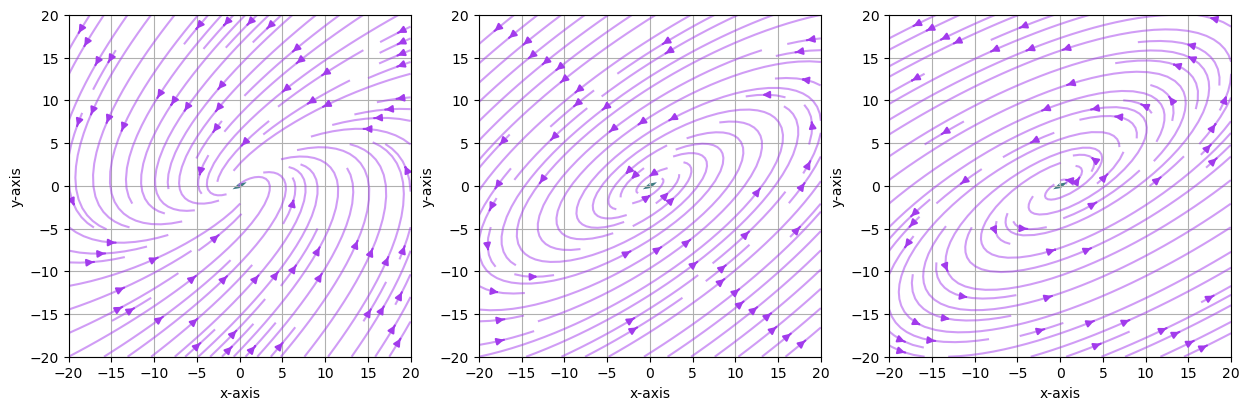

In [29]:
figure, ax = plt.subplots(1, 3, figsize=(15, 5))
A = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
A = (1/(2*sqrt(2))) * A

B = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
B = (1/2) * B

C = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
C = (1/sqrt(2)) * C

examples = [A, B, C]

for i, example in enumerate(examples):
    M = example

    # Compute right eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(M)
    print(f'Example {i+1}:\n')
    print(f'eigenvalues:\n {eigenvalues}')
    print(f'eigenvectors:\n {eigenvectors}\n')

    eigenvalues_real = eigenvalues.real
    eigenvectors_real = eigenvectors.real

    # Create a grid of points
    x, y = np.meshgrid(np.linspace(-20, 20, 15),
                       np.linspace(-20, 20, 20))

    # Apply the matrix A to each point in the vector field
    vec_field = np.stack([x, y])
    u, v = np.tensordot(M, vec_field, axes=1)

    # Plot the transformed vector field
    c = ax[i].streamplot(x, y, u - x, v - y, density=1,
                         linewidth=None, color='#A23BEC')
    c.lines.set_alpha(0.5)
    c.arrows.set_alpha(0.5)

    # Draw eigenvectors
    parameters = {'color': ['b', 'g'], 'angles': 'xy',
                  'scale_units': 'xy', 'scale': 1,
                  'width': 0.01, 'alpha': 0.5}
    origin = np.zeros((2, len(eigenvectors)))
    ax[i].quiver(*origin, eigenvectors_real[0],
                 eigenvectors_real[1], **parameters)
    ax[i].quiver(*origin,
                 - eigenvectors_real[0],
                 - eigenvectors_real[1],
                 **parameters)

    ax[i].set_xlabel("x-axis")
    ax[i].set_ylabel("y-axis")
    ax[i].grid()
    ax[i].set_aspect('equal', adjustable='box')

plt.show()

The vector fields explain why we observed the trajectories of the vector $v$ multiplied by $A$ iteratively before.

The pattern demonstrated here is because we have complex eigenvalues and eigenvectors.

We can plot the complex plane for one of the matrices using `Arrow3D` class retrieved from [stackoverflow](https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-a-3d-plot).

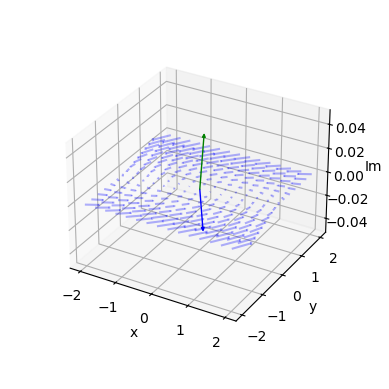

In [30]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d,
                                           self.axes.M)
        self.set_positions((0.1*xs[0], 0.1*ys[0]),
                           (0.1*xs[1], 0.1*ys[1]))

        return np.min(zs)


eigenvalues, eigenvectors = np.linalg.eig(A)

# Create meshgrid for vector field
x, y = np.meshgrid(np.linspace(-2, 2, 15),
                   np.linspace(-2, 2, 15))

# Calculate vector field (real and imaginary parts)
u_real = A[0][0] * x + A[0][1] * y
v_real = A[1][0] * x + A[1][1] * y
u_imag = np.zeros_like(x)
v_imag = np.zeros_like(y)

# Create 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
vlength = np.linalg.norm(eigenvectors)
ax.quiver(x, y, u_imag, u_real-x, v_real-y, v_imag-u_imag,
          colors='b', alpha=0.3, length=.2,
          arrow_length_ratio=0.01)

arrow_prop_dict = dict(mutation_scale=5,
                       arrowstyle='-|>', shrinkA=0, shrinkB=0)

# Plot 3D eigenvectors
for c, i in zip(['b', 'g'], [0, 1]):
    a = Arrow3D([0, eigenvectors[0][i].real],
                [0, eigenvectors[1][i].real],
                [0, eigenvectors[1][i].imag],
                color=c, **arrow_prop_dict)
    ax.add_artist(a)

# Set axis labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Im')
ax.set_box_aspect(aspect=None, zoom=0.8)

plt.draw()
plt.show()

```{solution-end}
```